In [43]:
print("CUSBS Python Introduction!")

CUSBS Python Introduction!


## What we will cover
* What is Python
    * Versions
    * Installation
    * Jupyter Notebook
* Problem Statement
* Python Fundamentals
    * Variables and datatypes
    * Functions
    * Lists
    * If-else statements
    * Loops
* Libraries and Plotting
    * Numpy
    * Scipy
    * Matplotlib
* Putting things together
        

## What is Python

* Interpreted, dynamically typed modern high-level language designed with readability and ease of use in mind. 
* Supports both procedural, functional and object-oriented
* Can interface to other languages like C (see: "ctypes") if fast execution of code is required
* Becoming common in scientific computing - many libraries are open source (*cough* matlab *cough*), easy to share code (github).

### Versions

Python has two versions that are similar but slightly different:
* Python 2 - legacy version of python, primarily maintained for backwards compatibility (computer systems are brittle and tend to break when new updates are released)
* Python 3 - newer version which this notebook is written in

For anything we will be doing - it doesn't really matter which version you use, it's possible to rewrite in either case, but lets stick to 3. Run the below code to check which version of Python you're on.

In [18]:
import sys
print(sys.version)

3.5.4 |Anaconda, Inc.| (default, Sep 19 2017, 08:15:17) [MSC v.1900 64 bit (AMD64)]


### Installation

We recommend that you install a Linux distribution for programming because it makes it easiest to install and software on your machine. The easiest and most commonly used Linux is Ubuntu: https://www.ubuntu.com/.

Python should come preinstalled on Ubuntu distribution. To check that you have python 3 installed 

```sh
python3 --version
```

* dollar sign \$ added just to indicate that this is a Linux command line  terminal
* You may also like to configure the bash environment alias "python" to point to the python3 interpreter

To simplify installing libraries (code others have written) for python install pythons package management tool: pip

```sh
sudo apt-get install python3-pip
```

To install a package like numpy (NumericPython) with pip:
```sh
sudo pip install numpy
```

Pip will then get to work and automatically install the packages that that are required for numpy and then numpy itself. Will will cover this later.

[Alternatively]

Install a distribution of Anaconda (https://anaconda.org/). This is a distribution of Python designed for scientific computing - it comes with a lot of packages like Numpy and Scipy preinstalled, and uses a different package manager called `conda` that is pretty similar to `pip`. However, `conda` is more thorough in making sure that all of your packages are compatible with each other (some packages depend on different versions of the other). It also includes a built-in environment manager, that lets you decide which packages are going to be accessible in a particular folder and even whether you use Python 2 or 3!

### Jupyter Notebook

Here we are working in Jupyter Notebook, a Python environment that's geared towards education and the natural sciences. It allows you to create boxes containing isolated segments of text (formatted using Markdown) or code, which can be compiled and ran individually. Any graphics that Python produces can be routed directly to the notebook, making it easy to both analyze and present your results.

All you have to do to edit a box is click on it (your current box will be highlighted in green). To run the code inside a box, hit CTRL+ENTER, or hit SHIFT+ENTER if you would also like to move to the next box. (Note that these shortcuts are for Windows and Linux) To see a full list of keyboard commands, click the keyboard symbol at the right end of the floating toolbar.

## Problem Statement

Most reactions in biological systems are catalyzed by enzymes. The rates at which these reactions proceed allow us to predict both dynamics and steady-state behaviour. Suppose an enzymatic reaction can be described by the following equation:

$$
S + E \leftrightarrow SE \to P
$$

Since the enzyme binds far more strongly to the substrate than the product, we can assume that the second step is a one-way reaction and that the rate of the process is just dependent on the substrate and enzyme concentrations. The equation of the reaction rate can then be described with just [S] and constants $V_{max}$ (the maximum speed at saturation of the enzyme, which is dependent on enzyme properties and concentration), and $K_{m}$ (a constant describing binding affinity). (Proof at https://depts.washington.edu/wmatkins/kinetics/michaelis-menten.html)

$$
\frac{\mathrm{d[P]}}{\mathrm{d}t} = \frac{V_{max}\mathrm{[S]}}{K_m + \mathrm{[S]}}
$$

We're interested in figuring out how the product and substrate concentrations change over time, and whether they might reach a steady state. However, in this case and many others in biology, it's a lot easier to express the rates of change than it is to solve for the actual quantities that we're interested in. We can't simply integrate the Michaelis-Menten equation because the <b>substrate concentration</b> is also a function of the same rate over time, and standard methods for solving differential equations would get messy quickly. We need a better solution, but it doesn't have to be <i>perfectly</i> accurate, especially given how noisy biology can be.

We can take a numerical approach to estimating the product and substrate concentration. Since we know the rate given a concentration, we can estimate the concentration at the next time step using the known rate at the current time step. From the definition of a derivative,

$$
\frac{dP}{dt} = \lim_{\delta t\to0} \frac{P(t+\delta t) - P(t)}{\delta t} \\
\frac{dP}{dt} \delta t \approx P(t+\delta t) - P(t)\\
P(t+dt) \approx P(t) + \delta t\left.\frac{dP}{dt}\right|_t
$$

So if we know the rate of change of a quantity, we can approximate its progression over time. The smaller the timestep $\delta t$, the closer it will be to the real solution in continuous time. This would be a lot of work to calculate by hand, which is why we use computers to do it.

How can we model the substrate and product concentrations of the Michaelis-Menten equation using Python?



## Python Fundamentals

### Variables and datatypes


Python is dynamically typed, meaning that there are no explicit typing constraints on the language. But if you try to add a boolean (True/False) to a String - expect it to fail!

In [19]:
False + "hello"

TypeError: unsupported operand type(s) for +: 'bool' and 'str'

#### Numbers 
Python 3 is clever about the way it handles division, unlike Python 2 the forward slash operator now produces floating point outputs, integer division now specified by '//' operator:

In [21]:
print(4/3)
print(4//3)

1.3333333333333333
1


The devil is in the details - remember that a real number in the mathematic sense is not the same as a floating point number as the latter only have a finite number of bits that are used to represent it:

In [22]:
0.1+0.1+0.1

0.30000000000000004

In particular this applies to performing comparisons between numbers:

In [23]:
0.3==(0.1+0.1+0.1)

False

Instead use a tolerance level (ie. a small numerical value)

In [24]:
0.3-(0.1+0.1+0.1)<1e-12

True

#### Variables

To be able to manipulate data in a symbolic way - we need to create variables. To do this, we use the asignment operator '=' (not to be confused with the mathematical meaning of equality, which in python is '=='). Basic asignment of variables is:

In [25]:
x=3 #create an integer
print(x+1) 
print(type(x)) #what is it's type?

x=3.0
print(type(x)) #what's it's type now?

x=y=1
print(y,x)

4
<class 'int'>
<class 'float'>
<class 'int'>
1 1


#### Exercise

Let's define variables to store some of the properties that we need to model the Michaelis-Menten equation. We need:
* `dt` that defines the size of the timestep in our numerical estimation. Let's set it to 0.01.
* `Km` that defines the Michaelis-Menten constant. Let's set it to 5.
* `Vmax` that defines the maximum reaction rate. Let's set it to 5.

As a reminder, the relevant equations are:

$$
\frac{\mathrm{d[P]}}{\mathrm{d}t} = \frac{V_{max}\mathrm{[S]}}{K_m + \mathrm{[S]}} \\
P(t+dt) \approx P(t) + \delta t\left.\frac{dP}{dt}\right|_t
$$

In [1]:
### YOUR CODE HERE




Don't worry about the defining the actual product and substrate concentrations yet. There's a better way of dealing with them.

### Functions

Functions are the bread and butter of programming - allows us to write isolated units of code and reuse them. Python does not require us to specify function input and output types - so it's up to you what you return, but don't get caught out, the compiler won't be able to save you. A Python function requires
 * A `def` statement indicating that the following lines are a function;
 * The name of the function that will be referenced when you want to use it;
 * The parameters taken as inputs (optional);
 * A return statement (also optional).
 
For example, a function to add two numbers `x` and `y` might look like this:

In [27]:
def f(x,y):
    return x+y

Let's try calling this function:

In [28]:
print(f(1,2))
print(f(1.5, 2))

3
3.5


Recall that Python is dynamically typed, meaning that we can use this function to add strings, and other data types as well. But be careful about matching data types!

In [29]:
print(f("Hello ", "World!"))

Hello World!


You can also set a default value for parameters:

In [30]:
def f2(x,y=2.0):
    return x+y

print(f2(1))

3.0


#### Exercise

In order to perform numerical estimation, let's write a function that can calculate the term,

$$
\frac{dP}{dt}
$$

If we know the parameters and the concentration of substrate at a given point in time, we can do it directly using the Michaelis-Menten equation. Let's write a function that gives the reaction rate as an output, with substrate concentration, $K_m$, and $V_{max}$ as inputs. As a reminder,

$$
\frac{\mathrm{d[P]}}{\mathrm{d}t} = \frac{V_{max}\mathrm{[S]}}{K_m + \mathrm{[S]}}
$$

In [3]:
### YOUR CODE HERE




### Lists

Lists are very fundamental data structures in Python. They act as ordered collections of items, in Python they do not have to have the same type - that is, you can have a single list containing strings, floating point numbers, functions, lists and other more complex data structures.

In [32]:
#manually
x = [1,2,3,4]
print(x)

#using range function
# range(start,end,step)
x = list(range(0,10))  
print(x)

#get the value at the start of the list:
print(x[0])

#assign to an element of list
x[1]="new_value"

# get the value at an index
print(x[1])



[1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
new_value


Unlike in many other languages, you can <b>directly access the last element of a list</b> without knowing its length. In applications such as ours, where we need to frequently do this, it makes our code a lot easier to write!

In [33]:
print(x[-1])

# The index -1 of a list with length zero is the same as index 0
y = [7]
print(y[0])
print(y[-1])

9
7
7


Lists can be defined in relation to other lists by specifying how elements of one may be obtained from the other. This is known as <b>list comprehension</b>):

In [1]:
#define basic list as some range of intger values
xs = [i for i in range(0,10)]
print(xs)

#can generate one list from another by defining how elements in ys are related to elements in xs
ys = [x**2 for x in xs]
print(ys)

#can filter elements of one list to create another - this is every similar to set definitions
even_ys = [y for y in ys if y%2==0]
print(even_ys)

#can apply functions to all elements of a list
def add_one(val):
    return val+1

zs = [add_one(x) for x in xs]
print(zs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 4, 16, 36, 64]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Unlike arrays in some other programming languages, lists can be resized. You can add an element to the end of a list in several ways:

In [2]:
x1s = [i for i in range(0,5)]
x2 = 5
print(x1s)

#add using operator overloading
print(x1s + [x2])
print(x1s)

#add using member function of list object
x1s.append(x2)
print(x1s)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]


Note that adding two lists together creates a new variable in memory, while using the `append` function of a list modifies the existing variable. This is important for two reasons:

1. If you want to keep your old list, the first method is useful.
2. You can't modify your list in a function using the first method.

Let's demonstrate the second point:

In [36]:
x1s = [i for i in range(0,5)]

def f1(list_input):
    list_input = list_input + [5]
    
def f2(list_input):
    list_input.append(5)
    
f1(x1s)
print(x1s)
f2(x1s)
print(x1s)
print(list_input)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]


NameError: name 'list_input' is not defined

In the first function, we've assigned our input list to the internal variable `list_input`, which only exists inside the function. But the body of the function simply reassigns the <b>local variable</b> specified by the input to the new list created by the addition of the input and the additional value. When the function finishes executing, the reference to `list_input` disappears. Since our new construct is not referenced anywhere else, it is erased from memory to save space. Note that `x1s` still exists because it has a reference outside the function.

In the second function, we've instructed the object referenced by `list_input`, in this case our list of numbers, to do something to itself. Although the reference to `list_input` disappears, the object is still there because it was defined outside the function and still has a reference, and the additional value is successfully appended.

To understand the idea of a local variable within a function, observe what happens when we try to print `list_input` after executing the two functions. It gives an error saying that 'list_input' is not defined! This means exactly what it says - the variable was only defined inside the functions, so it does not exist to anything outside the `def` statements. Note that defining the inputs of a function simply creates local variables that are assigned to values given when the function is called.

#### Exercise

Lists will be useful for us to store the rate of the reaction, and the concentrations of product and substrate, at each time point. They provide a <b>systematic way</b> of keeping all these values <b>in one place</b> so we can plot or analyze them later, and allow us to run our program for arbitrary time lengths <b>without defining new variables</b>. Let's define some lists:

* `substrate`, for the substrate concentration, with a value at time 0 of 10.
* `product`, for the product concentration, with a value at time 0 of 0.
* `rate`, for the Michaelis Menten rate. Leave this list empty, as we need to calculate the rate using the substrate concentration.

In [4]:
### YOUR CODE HERE




### If-else statements

Although they won't be necessary in this workshop, if-else statements are a useful part of any programming language for creating more complex behaviour. In computational biology, you will typically use them for <b>classification</b> of data or for producing behaviour in <b>edge cases</b>.

In [38]:
for i in range(0,5):
    if i%2 == 0:
        print(i, "IS EVEN")
    elif i%3 == 0:
        print(i, "IS DIVISIBLE BY 3")
    else:
        print(i, "IS ODD")

0 IS EVEN
1 IS ODD
2 IS EVEN
3 IS DIVISIBLE BY 3
4 IS EVEN


### Loops

One of the most powerful applications of computing is the ability to perform simple actions <b>repeatedly</b> to get a more complicated result. The simplest way to achieve this is with loops. The two most common types of loops are:

* `for` - This type of loop lets you iterate through the items in a list or, in general, repeat execution a defined number of times.
* `while` - This type of loop repeats an action until a condition is met.

Here's how you would add together the numbers from one to ten using each type of loop:

In [39]:
result = 0
for i in range(1,11):
    result = result + i
print(result)

result = 0
i = 1
while (i <= 10):
    result = result + i
    i = i + 1
print(result)

55
55


#### Exercise

Now let's generate some values of reaction rate over possible substrate concentrations for our Michaelis-Menten equation. Calculate the reaction rates for the list of substrate concentrations provided, `substrate_concentrations` using a <b>for loop</b>, and store them in the list `rate_substrate`.

Hints
* Iterate through the list of substrate concentrations provided.
* You've already defined a function for calculating reaction rates, called `mm_rate`. Use the constants that you've already saved in your variables.
* You know how to add values to the end of a list - either way will work here.

In [5]:
substrate_concentrations = range(0,11)
### YOUR CODE HERE





## Libraries

A library is a collection of code that someone else has written that you can use. The open-source nature of Python is a great advantage as for most modules, you can get a copy of the source code and see for yourself what it is doing. This is particularly useful for verifying simulations where even small changes in various parameters and coefficients can be the dividing line between success and failure.


### Numpy

Numpy contains utilities for mathematical operations, such as trigonometry, linear algebra, generation of random numbers. Of particular note is its N-dimensional array object, which is efficient for storage and manipulation.

In [41]:
import numpy as np 
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
print(x)

[[1 2 3]
 [4 5 6]]


Another useful Numpy function is `np.arange`, which is like Python's `range` function, but lets you specify increment size.

In [42]:
half_step = np.arange(0,5, step = 0.5)
print(half_step)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]


## Scipy
Scipy is a package that duplicates some of the features of Numpy and has some additional functionality. For example, it includes functions for curve-fitting, optimization, and signal processing. One tool that might be particularly useful for us is integration. Use the quad function for general integration. The two outputs are the value and the error bounds.

In [43]:
import scipy.integrate as integrate
result = integrate.quad(lambda x: x**2, 0, 4.5)
print(result)

(30.375, 3.372302437298913e-13)


## Matplotlib
This library generates figures for you. Matplotlib lets you produce almost every type of graph and chart that exists with a little bit of work. You can use `pyplot` as a sort of black box that plots things for you, but far more powerful is the object-oriented approach. This allows you to have direct access to each axis and everything you draw on it, giving you more control for complex plots. We will use the object-oriented approach.

Here we will look at how basic plotting works. First, we import the library. The second line tells Matplotlib to draw its figures within the Jupyter notebook (a fairly unique Python environment, so it needs specific instructions!).

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

Next, we initialise the figure, and add a set of axes to it.

<IPython.core.display.Javascript object>


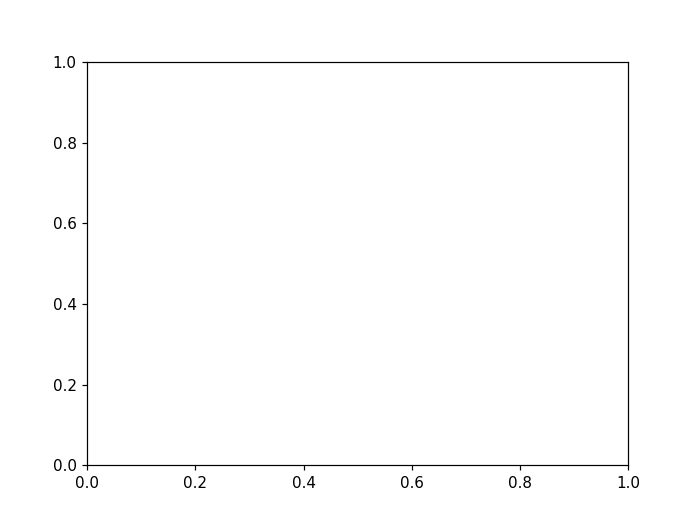

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

All we have to do now is plot the two variables `substrate_concentrations` and `rate_substrate` against each other. We should also label the axes.

In [46]:

ax1.plot(substrate_concentrations, rate_substrate)
ax1.set_xlabel("[S]")
ax1.set_ylabel("V")

If you've done all of the exercises correctly, the plot should look something like this.

<img src=https://i.gyazo.com/e7eb906ae697e9ce4e2f42d6ffee5f50.png/>

## Putting things together

Now we can get to our complete product. You need to do two things here:

1. Approximate the product concentration, substrate concentration, and rate over 10 seconds.
2. Plot all three properties over time on the same axes.

### Some reminders

The update equation you'll need to use is the following:
$$
S(t+dt) \approx S(t) + \delta t\left.\frac{dS}{dt}\right|_t
$$

You've already defined the following:

<b> Variables </b> - `dt` , `Km`, `Vmax`

<b> Functions </b> - `mm_rate`

<b> Lists </b> - `substrate_conc`, `product_conc`, `rate`

### Hints

* How can you use `np.arange` to generate your time points?

* At each time step, you'll need to calculate the rate of the reaction. This should be easy because you've already done most of the work!

* We previously iterated through an arbitrary list of substrate concentrations, which could have been thought of as the "x-variable". Here time is the "x-variable", and we've made lists to save all of the values for product and substrate concentration for each time point. But we want to use the substrate concentration at the immediately-previous timepoint to calculate values for the next one. How do we do this?

* Once we've calculated the values for the next time point, how do we ensure that they are available for the next iteration of the loop?

* The lists of substrate concentration and product concentration already have an initial value, while the list for rate does not. Be careful about writing your "for" loop such that all of the lists (including time on the x-axis) have the same dimensions. Otherwise plotting won't work!

* You can draw multiple plots on the same axes simply by calling the axis object's `plot` function again.

Run the following import statements before you get started.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

If your code doesn't work the first time, remember to reset the contents of the lists using the following lines of code. (Otherwise any values you generate will persist, and your timeseries data will quickly become nonsense)

In [58]:
substrate_conc = [10]
product_conc = [0]
rate = []

### Your Code Here

Write your code for the numerical estimation of Michaelis-Menten kinetics over time.

In [8]:
### YOUR CODE HERE



Now plot the results with `matplotlib`.

In [9]:
### YOUR CODE HERE

